<a href="https://colab.research.google.com/github/amfsunlimited/Machine-Learning-Beginner-/blob/main/MonkeyPox_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Monkeypox_Test.zip
!unzip Monkeypox_Train.zip
!unzip Monkeypox_Val.zip
!unzip Others_Test.zip
!unzip Others_Train.zip
!unzip Others_Val.zip


In [47]:
data_dir_monkey = ["Monkeypox_Test","Monkeypox_Train","Monkeypox_Val"]
data_dir_other = ["Others_Test","Others_Train","Others_Val"]




In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

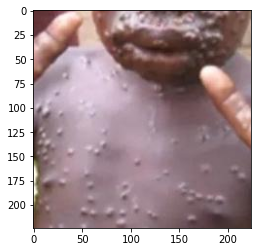

In [205]:
for data in data_dir_monkey:
  path = os.path.join("",data)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img),cv2.COLOR_BGR2RGB)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [34]:
IMG_SIZE = 100

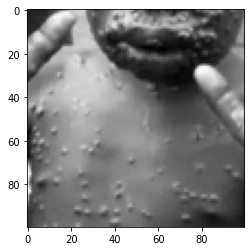

In [36]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [210]:
training_data = []
IMG_SIZE = 224

def create_training_data():
  path_monkey = os.path.join("",data_dir_monkey[1])
  for img in os.listdir(path_monkey):
    img_array = cv2.imread(os.path.join(path_monkey, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    training_data.append([img_array, 1])
  path_others = os.path.join("",data_dir_other[1])
  for img in os.listdir(path_others):
    img_array_other = cv2.imread(os.path.join(path_others, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array_other = cv2.resize(img_array_other, (IMG_SIZE, IMG_SIZE))
    training_data.append([img_array_other, 0])

In [211]:
create_training_data()

In [212]:
len(training_data)

2142

In [213]:
import random
random.shuffle(training_data)

In [214]:
for sample in training_data[:10]:
  print(sample[1])

0
0
1
1
1
0
1
1
1
0


In [215]:
X_train = []
y_train = []

In [216]:
for features, labels in training_data:
  X_train.append(features)
  y_train.append(labels)



In [219]:
X_train = np.array(X_train)
X_train.shape

(2142, 224, 224, 3)

In [220]:
X_train = X_train.reshape(X_train.shape[0], 224*224*3)
X_train.shape

(2142, 150528)

In [221]:
X_train.min(), X_train.max()

(0, 255)

In [222]:
X_train_norm = X_train/X_train.max()

In [223]:
X_train_norm

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.76470588, 0.70980392, 0.38431373, ..., 0.96470588, 0.98039216,
        0.9372549 ],
       [0.08627451, 0.08627451, 0.08627451, ..., 0.96078431, 0.9254902 ,
        0.92941176],
       ...,
       [0.02745098, 0.00392157, 0.        , ..., 0.03529412, 0.        ,
        0.        ],
       [0.01568627, 0.        , 0.01176471, ..., 1.        , 0.85882353,
        0.79607843],
       [0.20392157, 0.30588235, 0.51764706, ..., 0.61568627, 0.69019608,
        0.71764706]])

In [224]:
y_train_norm = np.asarray(y_train).astype("int64")

In [225]:
y_train_norm.shape

(2142,)

In [227]:
testing_data = []
IMG_SIZE = 100

def create_testing_data():
  path_monkey = os.path.join("",data_dir_monkey[0])
  for img in os.listdir(path_monkey):
    img_array = cv2.imread(os.path.join(path_monkey, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array, 1])
  path_others = os.path.join("",data_dir_other[0])
  for img in os.listdir(path_others):
    img_array_other = cv2.imread(os.path.join(path_others, img))
    img_array_other = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array_other = cv2.resize(img_array_other, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array_other, 0])
  path_monkey = os.path.join("",data_dir_monkey[2])
  for img in os.listdir(path_monkey):
    img_array = cv2.imread(os.path.join(path_monkey, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR) 
    # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array, 1])
  path_others = os.path.join("",data_dir_other[2])
  for img in os.listdir(path_others):
    img_array_other = cv2.imread(os.path.join(path_others, img))
    img_array_other = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    # new_array_other = cv2.resize(img_array_other, (IMG_SIZE, IMG_SIZE))
    testing_data.append([img_array_other, 0])

create_testing_data()

In [228]:
random.shuffle(testing_data)

In [229]:
X_test = []
y_test = []


for features, labels in testing_data:
  X_test.append(features)
  y_test.append(labels)



In [230]:
X_test = np.array(X_test)

In [231]:
X_test = X_test.reshape(X_test.shape[0], 224*224*3)

In [232]:
X_test_norm = X_test/X_test.max()

In [233]:
X_test_norm

array([[0.61960784, 0.65490196, 0.76078431, ..., 0.52156863, 0.55686275,
        0.6627451 ],
       [0.61960784, 0.65490196, 0.76078431, ..., 0.52156863, 0.55686275,
        0.6627451 ],
       [0.19607843, 0.17254902, 0.        , ..., 0.69411765, 0.58823529,
        0.47058824],
       ...,
       [0.61960784, 0.65490196, 0.76078431, ..., 0.52156863, 0.55686275,
        0.6627451 ],
       [0.61960784, 0.65490196, 0.76078431, ..., 0.52156863, 0.55686275,
        0.6627451 ],
       [0.71764706, 0.64705882, 0.6       , ..., 0.6627451 , 0.55686275,
        0.51372549]])

In [234]:
y_test_norm = np.asarray(y_test).astype("int64")

In [235]:
X_test_norm.shape, y_test_norm.shape

((465, 150528), (465,))

In [236]:
y_test_norm[:10]

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [237]:
# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import *

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [244]:
# defining the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [245]:
from tensorflow.keras.optimizers import Adam
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [246]:
# importing module for early stopping
from keras.callbacks import EarlyStopping
# setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5, mode='min')

In [247]:
# training the model for 100 epochs

# defining the early stopping as callback using callbacks parameter of model.fit
model_history = model.fit(X_train_norm, y_train_norm,epochs=100, batch_size=128,validation_data=(X_test_norm,y_test_norm), callbacks=[early_stopping])

Epoch 1/100
17/17 [==============================] - 6s 311ms/step - loss: 0.4357 - accuracy: 0.7885 - val_loss: 0.2164 - val_accuracy: 0.9957
Epoch 2/100
17/17 [==============================] - 5s 278ms/step - loss: 0.1145 - accuracy: 0.9902 - val_loss: 0.0971 - val_accuracy: 0.9978
Epoch 3/100
17/17 [==============================] - 5s 282ms/step - loss: 0.0662 - accuracy: 0.9911 - val_loss: 0.0647 - val_accuracy: 0.9914
Epoch 4/100
17/17 [==============================] - 5s 280ms/step - loss: 0.0493 - accuracy: 0.9939 - val_loss: 0.0487 - val_accuracy: 0.9935
Epoch 5/100
17/17 [==============================] - 5s 278ms/step - loss: 0.0412 - accuracy: 0.9967 - val_loss: 0.0398 - val_accuracy: 0.9935
Epoch 6/100
17/17 [==============================] - 5s 283ms/step - loss: 0.0372 - accuracy: 0.9958 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 7/100
17/17 [==============================] - 5s 281ms/step - loss: 0.0332 - accuracy: 0.9972 - val_loss: 0.0334 - val_accuracy: 0.9935

In [248]:
model.save("ANN_MonkeyPox.h5")

In [124]:
import pickle

pickle_out = open("X.pickle", 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()